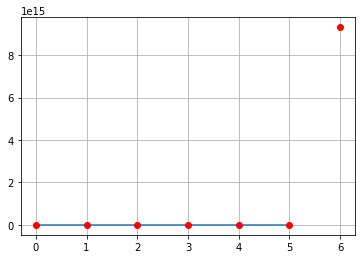

In [6]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

def exponential_fit(x, a, b, c):
    return a*np.exp(-b*x) + c

if __name__ == "__main__":
    x = np.array([0, 1, 2, 3, 4, 5])
    y = np.array([30, 50, 80, 160, 300, 580])
    fitting_parameters, covariance = curve_fit(exponential_fit, x, y)
    a, b, c = fitting_parameters

    next_x = 50
    next_y = exponential_fit(next_x, a, b, c)

    plt.plot(y)
    plt.plot(np.append(y, next_y), 'ro')
    plt.grid()
    plt.show()